In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import folium
from bokeh.palettes import Category20, Category20b, Turbo256
from bokeh.io import output_file, show, output_notebook
from bokeh.models import ColumnDataSource, FactorRange, Legend
from bokeh.plotting import figure
from bokeh.transform import dodge
import bokeh

In [96]:
weekdays=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [20]:
colors = np.append(Category20[20], Category20b[10])

In [78]:
colors

array(['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a',
       '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94',
       '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d',
       '#17becf', '#9edae5', '#393b79', '#5254a3', '#6b6ecf', '#9c9ede',
       '#637939', '#8ca252', '#b5cf6b', '#cedb9c', '#8c6d31', '#bd9e39'],
      dtype='<U7')

In [5]:
crashes = pd.read_csv("./data/crashes_2019_regions.csv")

In [4]:
len(crashes)

116294

In [5]:
crashes = crashes[crashes['REGION_ID']!=-1]

In [6]:
len(crashes)

115493

In [92]:
def label_weekday (index):
    index=index-1
    return weekdays[index]

In [94]:
crashes['STRING_CRASH_DAY_OF_WEEK'] = crashes.apply ( lambda row: label_weekday(row['CRASH_DAY_OF_WEEK']), axis=1)


Text(0, 0.5, 'Number of crashes')

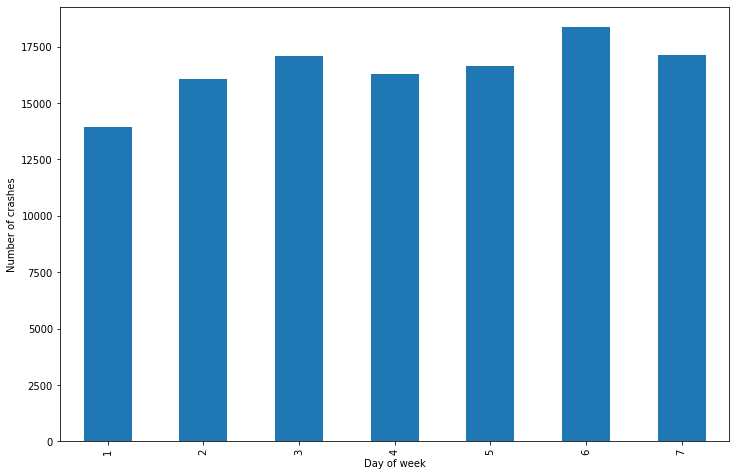

In [115]:
day_plot = crashes['CRASH_DAY_OF_WEEK'].value_counts().sort_index().plot(kind='bar', figsize=(12, 8))
#day_plot.set_xticklabels(crashes['STRING_CRASH_DAY_OF_WEEK'])
day_plot.set_xlabel("Day of week")
# Set the y-axis label
day_plot.set_ylabel("Number of crashes")

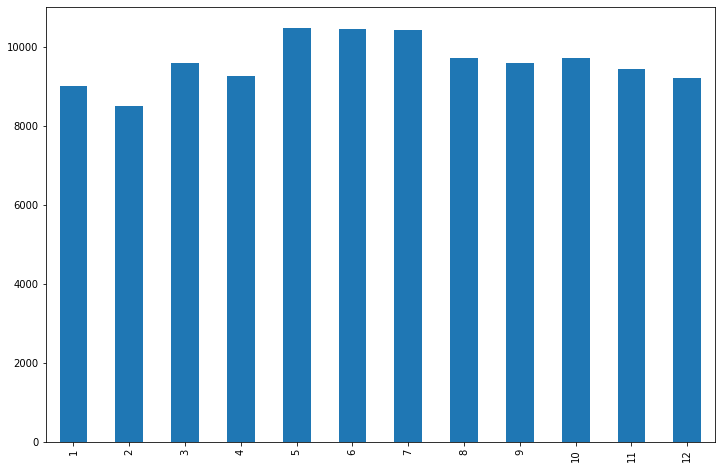

In [11]:
month_plot = crashes['CRASH_MONTH'].value_counts().sort_index().plot(kind='bar', figsize=(12, 8))

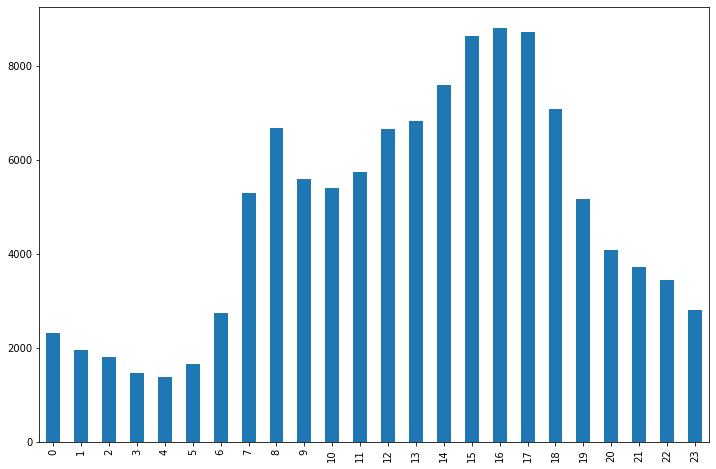

In [12]:
hour_plot = crashes['CRASH_HOUR'].value_counts().sort_index().plot(kind='bar', figsize=(12, 8))


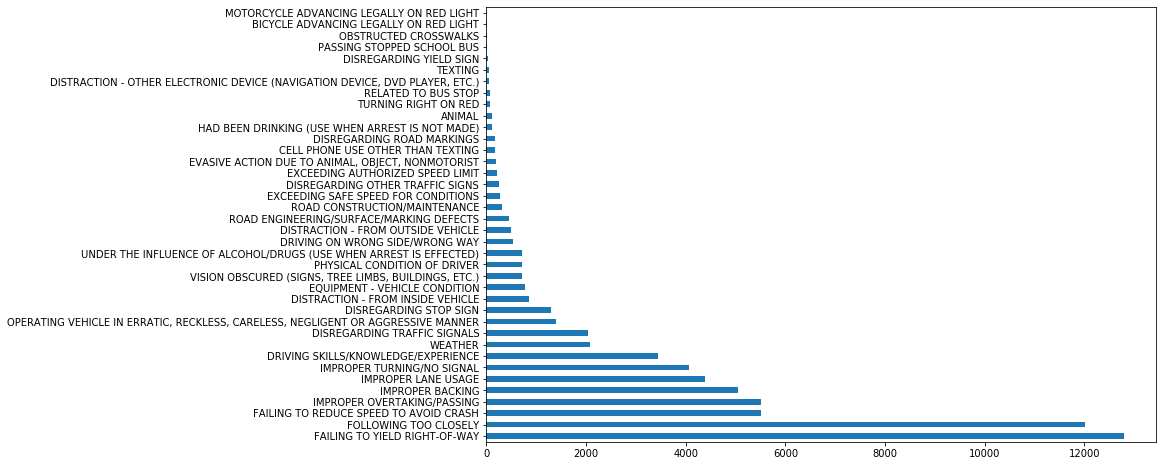

In [36]:
crashes_primary = crashes[crashes['PRIM_CONTRIBUTORY_CAUSE']!='UNABLE TO DETERMINE']
crashes_primary = crashes_primary[crashes_primary['PRIM_CONTRIBUTORY_CAUSE']!='NOT APPLICABLE']
primary_cause_plot = crashes_primary['PRIM_CONTRIBUTORY_CAUSE'].value_counts().plot(kind='barh', figsize=(12, 8))


In [ ]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdays_short = [x[:3] for x in weekdays]
fig, axes = plt.subplots(7,2,sharex="all", sharey="none")
fig.set_figwidth(15)
fig.set_figheight(20)
fig.suptitle('Weekly patterns of focus crimes')
fig.subplots_adjust(hspace = .5)
col = 0
row = 0
for crime in focus_crimes:
    plot_data = data[data['Category'] == crime].groupby('DayOfWeek').size().reindex(weekdays)
    axes[row,col].set_title(crime)
    axes[row,col].bar(weekdays_short,plot_data, facecolor="white", edgecolor="black")
    if col == 0:
        axes[row,col].set_ylabel('crime count')
    if col == 1:
        col = 0
        row += 1
    else:
        col = 1


In [14]:
congestion = pd.read_csv("./data/congestion_2019.csv")

In [15]:
congestion.head()

,TIME,REGION_ID,SPEED,REGION,BUS_COUNT,NUM_READS,HOUR,DAY_OF_WEEK,MONTH,DESCRIPTION,RECORD_ID,WEST,EAST,SOUTH,NORTH,NW_LOCATION,SE_LOCATION
0,06/05/2019 01:10:56 PM,1,22.50,Rogers Park - West Ridge,34,703,13,4,6,North of Devon. Kedzie to Lake Shore,01-201906051810,-87.709645,-87.654561,41.997946,42.026444,POINT (-87.709645 42.026444),POINT (-87.654561 41.997946)
1,06/26/2019 10:40:25 PM,2,27.95,Far North West,26,431,22,4,6,North of Montrose. East River to Cicero,02-201906270340,-87.846210,-87.747456,41.960669,42.019100,POINT (-87.84621 42.0190998),POINT (-87.747456 41.960669)
2,06/05/2019 01:10:56 PM,6,22.50,Irving Park-Avondale-North Ctr,48,1106,13,4,6,Diversey to Montrose. Cicero to Ravenswood,06-201906051810,-87.747456,-87.674590,41.931841,41.960669,POINT (-87.747456 41.960669),POINT (-87.67459 41.931841)
3,06/05/2019 01:10:56 PM,21,25.23,Hyde Park-Kenwood-Woodlawn,54,1296,13,4,6,71st to Pershing. Cottage Grove to Lake Shore,21-201906051810,-87.606334,-87.566260,41.764066,41.822792,POINT (-87.606334 41.822792),POINT (-87.56626 41.764066)
4,06/05/2019 01:10:56 PM,2,27.95,Far North West,33,589,13,4,6,North of Montrose. East River to Cicero,02-201906051810,-87.846210,-87.747456,41.960669,42.019100,POINT (-87.84621 42.0190998),POINT (-87.747456 41.960669)


In [16]:
avg_speed = congestion.groupby('REGION_ID')['SPEED'].mean().sort_values()

In [30]:
avg_speed

REGION_ID
13    18.773307
12    19.132034
29    19.161842
4     20.189186
1     20.577023
8     20.809373
28    20.995748
7     21.460690
6     22.633488
9     22.660063
11    22.746675
5     22.866838
3     23.235282
21    23.674692
10    23.731599
14    24.040862
16    24.206990
23    24.224280
17    24.532245
24    24.968909
18    25.105557
25    25.541197
15    25.744760
20    25.892239
19    26.006201
2     26.683292
22    27.682327
27    28.521725
26    28.672279
Name: SPEED, dtype: float64

In [77]:
crashes['REGION_ID'].unique()

array([ 3, 15, 18, 19,  2,  8, 26,  6,  7, 20, 13, 22, 10,  5, 11,  4, 14,
       16, 28,  9, 23, 12, 21, 24,  1, 17, 27, 25, 29, -1])

In [20]:
crashes_region = crashes.groupby('REGION_ID')['CRASH_RECORD_ID'].count()

In [38]:
crashes_region

REGION_ID
1     2592
2     4114
3     5199
4     2940
5     6591
6     4895
7     4922
8     6159
9     2873
10    6406
11    6782
12    4140
13    5461
14    4409
15    4024
16    2847
17    1288
18    7739
19    4021
20    3413
21    3190
22    2267
23    4908
24    3625
25    1832
26    3923
27    1477
28    1049
29    2407
Name: CRASH_RECORD_ID, dtype: int64

In [ ]:
# dt = pd.concat([avg_speed, crashes_region], axis=1)

In [46]:
dt = pd.concat([avg_speed, crashes_region], axis=1, join='inner')

In [49]:
dt

,SPEED,CRASH_RECORD_ID
REGION_ID,,
13,18.773307,5461
12,19.132034,4140
29,19.161842,2407
4,20.189186,2940
1,20.577023,2592
8,20.809373,6159
28,20.995748,1049
7,21.460690,4922
6,22.633488,4895


KeyError: 'CRASH_ID'

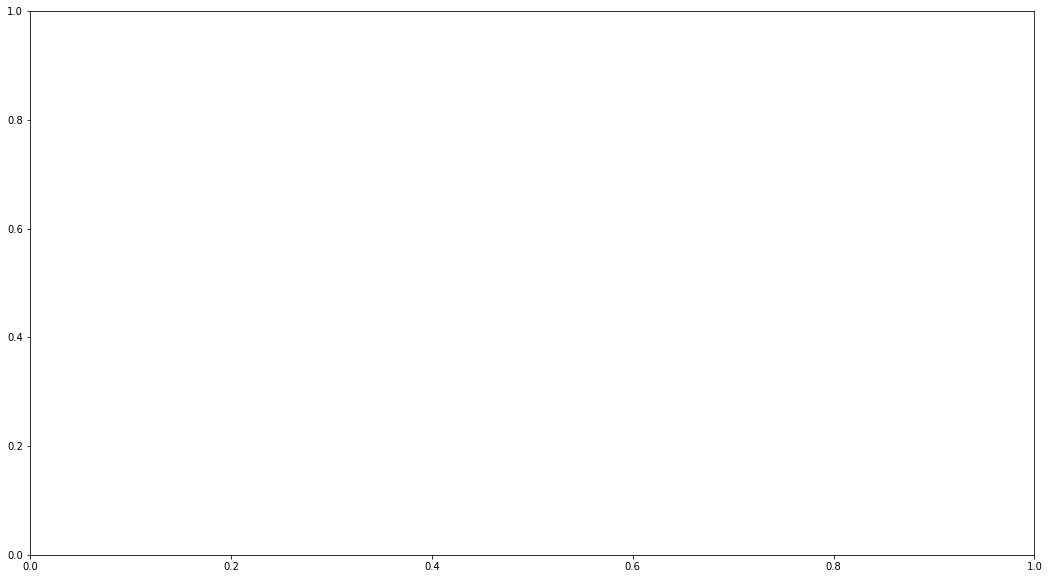

In [56]:
dt.plot.scatter(x='SPEED', y='CRASH_ID', figsize=(18,10))

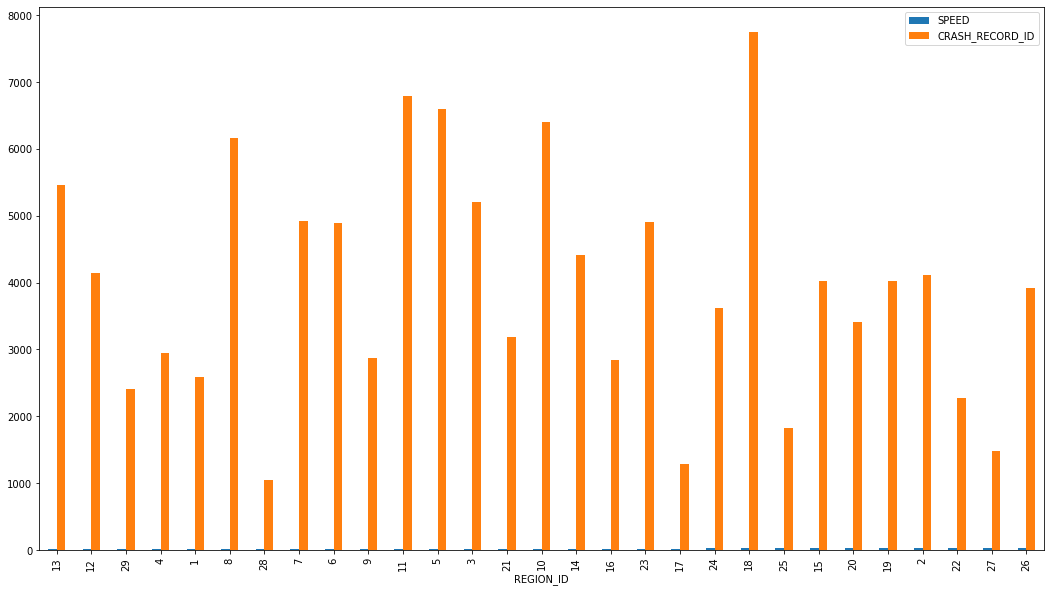

In [51]:
dt.plot.bar(figsize=(18,10))

In [48]:
dt.plot.bar(kind='barh', figsize=(18,10), x='REGION_ID', y=[]'Average speed')

KeyError: 'REGION_ID'

In [67]:
region_crashes = crashes.groupby('REGION_ID')['CRASH_RECORD_ID'].count().sort_values()

Text(0.5, 0, 'Number of crashes')

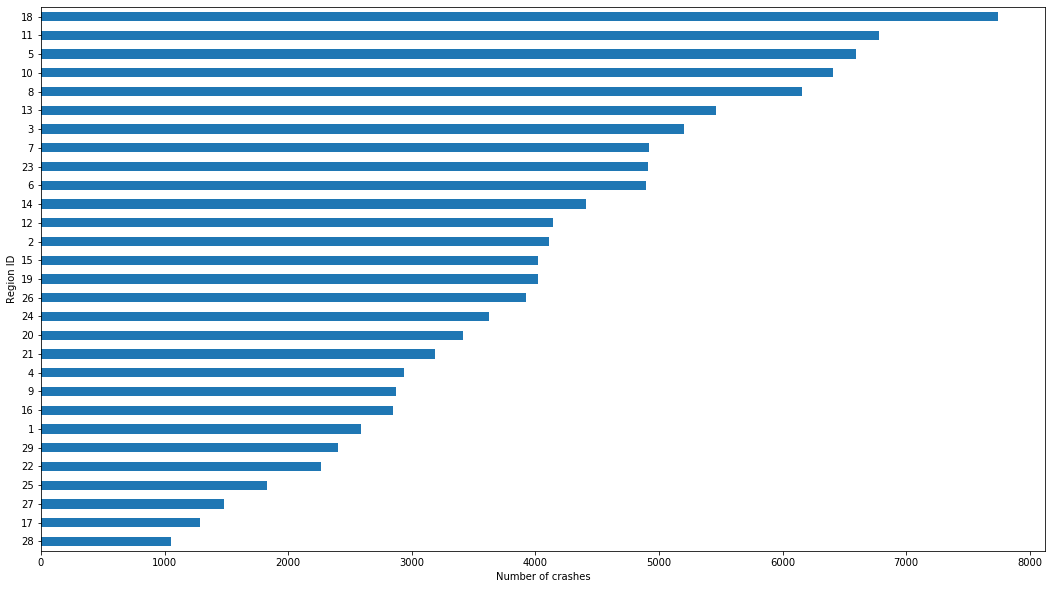

In [84]:
region_crashes_plot = region_crashes.plot(kind='barh', figsize=(18,10), x='Region ID', y='Average speed')
region_crashes_plot.set_ylabel("Region ID")
region_crashes_plot.set_xlabel("Number of crashes")

Text(0, 0.5, 'Region ID')

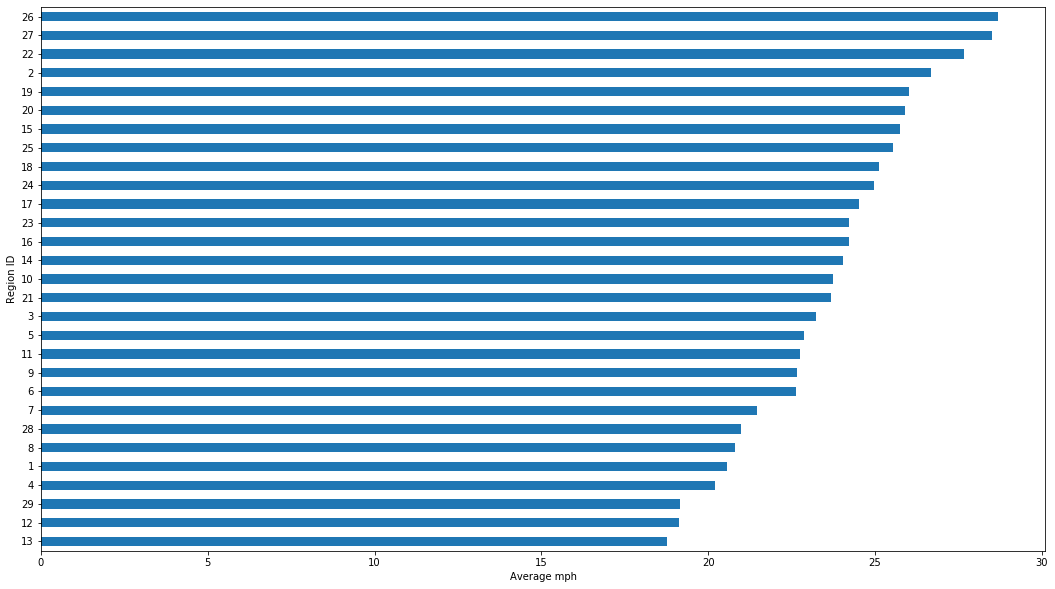

In [61]:
avg_speed_plot = x.plot(kind='barh', figsize=(18,10), x='Region ID', y='Average speed')
avg_speed_plot.set_xlabel("Average mph")
avg_speed_plot.set_ylabel("Region ID")

NameError: name 'crashes' is not defined

In [55]:
crashes

,CRASH_RECORD_ID,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,00027e2894dd2f3fe4ff320a6d332d18e465b5c8ba2e79...,JC201794,03/27/2019 04:20:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,...,0.0,0.0,4.0,0.0,16,4,3,41.994704,-87.699395,POINT (-87.699395085278 41.994703544264)
1,0006882952e53c291df267014a03b57684383e9ad66d9e...,JC459747,10/04/2019 12:00:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,...,0.0,0.0,2.0,0.0,12,6,10,41.848490,-87.675599,POINT (-87.67559940405 41.848490427751)
2,000dc02596041f0d23b030e424516c01221f2f8d6e856b...,JC395768,08/17/2019 02:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,ONE-WAY,...,1.0,0.0,2.0,0.0,2,7,8,41.811379,-87.728756,POINT (-87.728755676298 41.811379220467)
3,0013078a32c3a452c21799ac34823a0bb654d57dc2a52a...,JC147347,02/10/2019 03:00:00 PM,30,TRAFFIC SIGNAL,UNKNOWN,SNOW,DAYLIGHT,REAR END,NOT DIVIDED,...,0.0,0.0,3.0,0.0,15,1,2,41.834736,-87.670648,POINT (-87.670648134717 41.83473593522)
4,001339be9d4bad5f87eccd13f23f09cd1ae7dfee652af0...,JC395813,08/17/2019 03:25:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,...,0.0,0.0,3.0,0.0,3,7,8,41.764613,-87.683094,POINT (-87.683093871433 41.76461295199)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116289,4b67f5da2a35899e16fc532947b6be67cc4885aaa508c1...,JC278396,05/25/2019 05:55:00 PM,10,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,...,0.0,0.0,1.0,0.0,17,7,5,41.969509,-87.762340,POINT (-87.762339911714 41.969509310771)
116290,807a80b8b65840dbebffd457806e9bf51bbe896885740d...,JC514021,11/17/2019 01:30:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,...,0.0,0.0,2.0,0.0,13,1,11,41.910954,-87.652861,POINT (-87.652860730516 41.910954026224)
116291,e5fe2f5cd38470d2c1d55650ed5890ac83e033151274c8...,JC470973,10/10/2019 08:34:00 PM,30,NO CONTROLS,NO CONTROLS,RAIN,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,NOT DIVIDED,...,0.0,0.0,1.0,0.0,20,5,10,41.894853,-87.721024,POINT (-87.721024286409 41.89485296051)
116292,be972c2f9104860ba3b38c4208b74d1d92641736248e42...,JC346058,07/12/2019 04:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,...,0.0,0.0,4.0,0.0,16,6,7,41.907814,-87.775408,POINT (-87.775408056534 41.907814460403)


In [6]:
output_notebook()

Loading BokehJS ...

In [7]:
crashes_primary = crashes[crashes['PRIM_CONTRIBUTORY_CAUSE']!='UNABLE TO DETERMINE']
crashes_primary = crashes_primary[crashes_primary['PRIM_CONTRIBUTORY_CAUSE']!='NOT APPLICABLE']
cp = crashes_primary['PRIM_CONTRIBUTORY_CAUSE'].unique()

In [8]:
causes_norm = pd.DataFrame({'CRASH_HOUR': np.arange(1,25)})
for cause in cp:
    cause_hist = crashes_primary[crashes_primary['PRIM_CONTRIBUTORY_CAUSE'] == cause].groupby('CRASH_HOUR').size()
    cause_hist_norm = cause_hist / cause_hist.sum()
    causes_norm[cause] = cause_hist_norm
causes_norm.fillna(0)

,CRASH_HOUR,FAILING TO YIELD RIGHT-OF-WAY,FOLLOWING TOO CLOSELY,"EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST",WEATHER,FAILING TO REDUCE SPEED TO AVOID CRASH,IMPROPER TURNING/NO SIGNAL,DISREGARDING TRAFFIC SIGNALS,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,IMPROPER OVERTAKING/PASSING,...,CELL PHONE USE OTHER THAN TEXTING,HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE),"DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)",TURNING RIGHT ON RED,DISREGARDING YIELD SIGN,MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT,BICYCLE ADVANCING LEGALLY ON RED LIGHT,TEXTING,PASSING STOPPED SCHOOL BUS,OBSTRUCTED CROSSWALKS
0,1,0.011101,0.011073,0.050761,0.022105,0.031878,0.015998,0.037146,0.015942,0.012319,...,0.044693,0.052174,0.015152,0.025316,0.000000,0.000000,0.000000,0.062500,0.000000,0.055556
1,2,0.009068,0.009325,0.010152,0.017780,0.026444,0.012552,0.031281,0.011304,0.009239,...,0.039106,0.086957,0.030303,0.025316,0.000000,0.000000,0.000000,0.041667,0.000000,0.000000
2,3,0.005941,0.008492,0.020305,0.014897,0.026988,0.013291,0.038612,0.011014,0.008696,...,0.016760,0.017391,0.000000,0.000000,0.000000,0.000000,0.111111,0.083333,0.047619,0.000000
3,4,0.004612,0.005328,0.010152,0.017299,0.020830,0.006399,0.030303,0.009565,0.005435,...,0.022346,0.069565,0.015152,0.012658,0.000000,0.000000,0.000000,0.020833,0.000000,0.000000
4,5,0.005707,0.006411,0.020305,0.014897,0.015215,0.008122,0.023949,0.010725,0.004891,...,0.016760,0.043478,0.015152,0.012658,0.046512,0.000000,0.000000,0.020833,0.000000,0.000000
5,6,0.009146,0.007993,0.045685,0.025469,0.018475,0.009845,0.026882,0.009275,0.007609,...,0.005587,0.017391,0.060606,0.025316,0.000000,0.000000,0.000000,0.020833,0.000000,0.000000
6,7,0.021967,0.025560,0.020305,0.039885,0.022279,0.020428,0.038612,0.022899,0.018841,...,0.022346,0.052174,0.015152,0.025316,0.046512,0.000000,0.000000,0.000000,0.047619,0.111111
7,8,0.048859,0.053534,0.045685,0.074003,0.044014,0.044794,0.042033,0.042319,0.047101,...,0.033520,0.026087,0.030303,0.088608,0.023256,0.166667,0.222222,0.041667,0.142857,0.000000
8,9,0.069340,0.063442,0.055838,0.083133,0.048904,0.063500,0.050342,0.062319,0.068841,...,0.044693,0.026087,0.060606,0.075949,0.046512,0.166667,0.000000,0.000000,0.190476,0.111111
9,10,0.050266,0.048039,0.060914,0.064392,0.041478,0.046517,0.040567,0.061449,0.054167,...,0.033520,0.017391,0.030303,0.025316,0.069767,0.000000,0.000000,0.020833,0.047619,0.055556


In [9]:
source = causes_norm

In [22]:
p = figure(x_range = FactorRange(factors=causes_norm.CRASH_HOUR.astype(str)), title="Crash primary causes throughout the day", x_axis_label='Hour of the day', y_axis_label='Relative frequency', plot_width=1000, toolbar_location='left') 

In [23]:
bar = {}
colors = np.append(Category20[20], Category20b[20])
items = []

for indx,i in enumerate(cp):
    bar[i] = p.vbar(x = dodge('CRASH_HOUR', -.5, range=p.x_range), top=i, source=source, muted_alpha=0.01, muted=True, width=.5, fill_color=colors[indx]) 
    items.append((i, [bar[i]]))    

In [20]:
legend = Legend(items=items, location='center')

p.add_layout(legend, 'right')
p.legend.click_policy="mute" 

In [24]:
legend = Legend(items=items, location=(0, -60))
legend.click_policy="mute"

p.add_layout(legend, 'below')

show(p)

In [25]:
show(p)